In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Define the function σ(xi)
def sigma(xi):
    return (1 - np.exp(-100 * xi)) / (1 + np.exp(-100 * xi))

# Define the differential equation for the Hopfield network
def hopfield(t, x):
    W = np.array([[0, 1], [1, 0]])
    b = np.array([0, 0])
    x_dot = 0.5 * x + 0.5 * np.dot(W.T, sigma(x)) + 0.5 * b
    return x_dot

In [3]:
# Define a grid of initial conditions
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
initial_conditions = [(x0, y0) for x0 in x_range for y0 in y_range]

In [4]:
# Integrate the system for each initial condition
trajectories = []
for init_cond in initial_conditions:
    sol = solve_ivp(hopfield, (0, 10), init_cond, t_eval=np.linspace(0, 10, 250))
    trajectories.append(sol.y)

/var/folders/q5/qkg51wtd7t74xfnj9v271xfw0000gn/T/ipykernel_14008/589809662.py:3: RuntimeWarning: overflow encountered in exp
  return (1 - np.exp(-100 * xi)) / (1 + np.exp(-100 * xi))
/var/folders/q5/qkg51wtd7t74xfnj9v271xfw0000gn/T/ipykernel_14008/589809662.py:3: RuntimeWarning: invalid value encountered in divide
  return (1 - np.exp(-100 * xi)) / (1 + np.exp(-100 * xi))


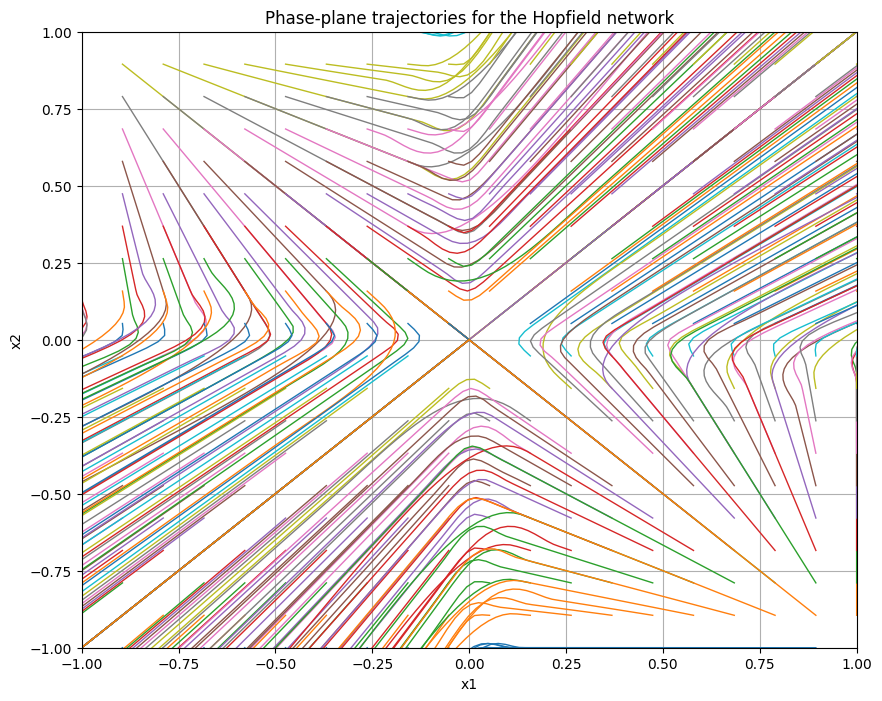

In [6]:
# Plot the trajectories
plt.figure(figsize=(10, 8))
for traj in trajectories:
    plt.plot(traj[0], traj[1], lw=1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Phase-plane trajectories for the Hopfield network")
plt.grid(True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.savefig('hopﬁeld.svg', format='svg')
plt.show()